<a href="https://colab.research.google.com/github/AdriVilla/abTest/blob/main/ENews_Express_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Problem definition:

A decline in new monthly subscribers compared to the last year because the current web page is not designed well enough in terms of the outline & recommended content, therefore,  potencial clients don't spend enough time in the page to make the decision to subscribe.

Objective: Carry out an A/B testing by comparing the engagement of the old landing page with the new landing page.

Questions to be answered:

- Do the users spend more time on the new landing page than on the existing landing page?
- Is the conversion rate for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language?
- Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['abtest.csv']))
#data = pd.read_csv('abtest.csv')
#df = data.copy()

Saving abtest.csv to abtest (1).csv


In [ ]:
df = df2.copy()

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Data Overview

In [ ]:
# Viewing first and last rows of data set
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#Checking the shape of the data frame
df.shape

(100, 6)

There are 100 observations (rows) and 6 variables (columns)

In [ ]:
#Getting the statistical summary of the variables 
df.describe(include= 'all').T   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Object type variables:
- There are two types of `group`: The sample of 100 observations is divided into two: "control" and "treatment" - 50/50 respectively.
-  There are two types of `landing_page`: The sample of 100 observations is divided into two: "old" and "new" - 50/50 respectively.
* control = old ; treatment = new
- The variable `converted` has two types: "yes" and "no", where "yes" has the highest frequency (54%) for all the sample (old and new).
- For `language_preferred`, there are three options: "Spanish", "English" and "French", where "Spanish" has the highest frequency (34%)for all the sample.  - EDA shows another side of the coin.

Numerical type variables:
- `time_spent_on_the_page` has a mean of of 5.38 and a median (50%) of 5.42 minutes. The minimum time spent on a landing page was 19 seconds and the maximum was 10.71 minutes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 6 variables from where 4 are of type "object" and 2 are of type numerical "int64" and "float64".

#### Checking of missing values

In [ ]:
df.isnull().sum()   

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values

In [ ]:
df.duplicated().sum()  

0

No duplicated values

### Univariate Analysis

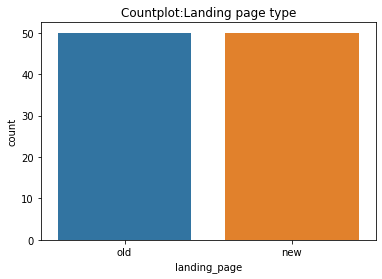

In [ ]:
sns.countplot(data=df, x='landing_page')
plt.title('Countplot:Landing page type');

Sample is divided in equal parts: 50 old (control) /50 new (treatment).

yes    54
no     46
Name: converted, dtype: int64

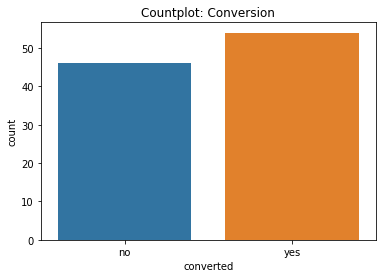

In [ ]:
sns.countplot(data=df, x='converted')
plt.title('Countplot: Conversion')
df['converted'].value_counts() 

For the whole sample, converted 'yes' seems to be the most frequent with 54 counts while 'no' has a total count of 46.

This graph does not show conversion separately for each landing page.

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

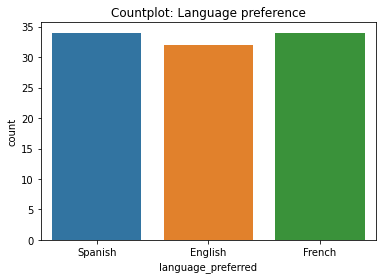

In [ ]:
sns.countplot(data=df, x='language_preferred')
plt.title('Countplot: Language preference');
df['language_preferred'].value_counts()

As observed in the "describe" function, Spanish seemed to be the most frequent category for preferred language, however, French and Spanish actually have the same 34 frequency count. English is just a little behind with 32 counts. The difference between preferred languages is minimal for all the sample. 


This graph does not show language preference separately for each landing page.

Mean time spent on the landing page is: 5.38
Maximum time spent on the landing page is: 10.71
Minimum time spent on the landing page is: 0.19


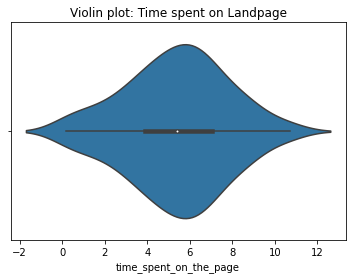

In [ ]:
sns.violinplot(data=df, x='time_spent_on_the_page', showmeans=True)
plt.title('Violin plot: Time spent on Landpage');
print('Mean time spent on the landing page is:',round(df['time_spent_on_the_page'].mean(),2))
print('Maximum time spent on the landing page is:',df['time_spent_on_the_page'].max())
print('Minimum time spent on the landing page is:',df['time_spent_on_the_page'].min())

### Bivariate Analysis

Minimum time            time_spent_on_the_page
group                            
control                      0.19
treatment                    1.65
Maximum time            time_spent_on_the_page
group                            
control                     10.30
treatment                   10.71
Mean time            time_spent_on_the_page
group                            
control                    4.5324
treatment                  6.2232


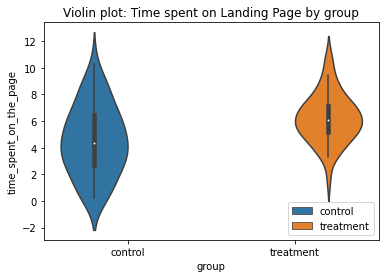

In [ ]:
sns.violinplot(data=df, x='group', y= 'time_spent_on_the_page', hue ='group', showmeans=True)
plt.legend(fontsize= 'small')
plt.legend(loc='lower right')
plt.title('Violin plot: Time spent on Landing Page by group');
print('Minimum time',df.groupby(['group'])[['time_spent_on_the_page']].min())
print('Maximum time',df.groupby(['group'])[['time_spent_on_the_page']].max())
print('Mean time',df.groupby(['group'])[['time_spent_on_the_page']].mean())


It seems that in comparison with the old (control) landing page,the new landing page (treatment), on average, has changed positively the minimum time spent on the landing page from 19 seconds to 1.65 minutes of engagement.

The increase in the maximal time is just 4% and the mean engagement time encreased 37.3% from 4.53 to 6.22 minutes.

Minimum time                               time_spent_on_the_page
group     language_preferred                        
control   English                               0.22
          French                                0.40
          Spanish                               0.19
treatment English                               3.65
          French                                3.30
          Spanish                               1.65
Maximum time                               time_spent_on_the_page
group     language_preferred                        
control   English                              10.30
          French                                9.15
          Spanish                               8.72
treatment English                              10.50
          French                               10.71
          Spanish                               8.08
Mean time                               time_spent_on_the_page
group     language_preferred                        
control   

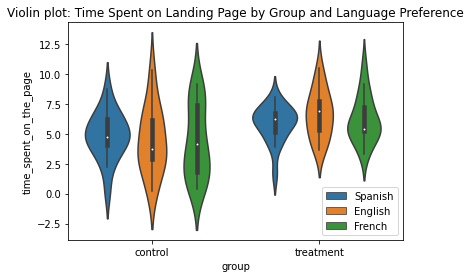

In [ ]:
sns.violinplot(data=df, x='group', y= 'time_spent_on_the_page', hue = 'language_preferred', showmeans=True)
plt.legend(fontsize= 'small')
plt.legend(loc='lower right')
plt.title('Violin plot: Time Spent on Landing Page by Group and Language Preference');
print('Minimum time',df.groupby(['group','language_preferred'])[['time_spent_on_the_page']].min())
print('Maximum time',df.groupby(['group','language_preferred'])[['time_spent_on_the_page']].max())
print('Mean time',df.groupby(['group','language_preferred'])[['time_spent_on_the_page']].mean())

Analyzing the details by grouping by "preferred language", all languages show an increase in the minimum time, however, for the maximum time, "Spanish" new landing page shows a slight decrease of time engagement (-7.34%)in comparison with the old landing page. 

The mean engagement time for all languages is higher (37.3%) with the new landing page than with the old one.

converted
group     converted           
control   no                29
          yes               21
treatment no                17
          yes               33

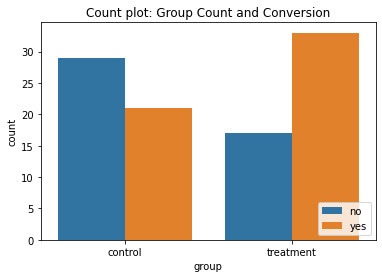

In [ ]:
sns.countplot(data=df, x='group', hue = 'converted')
plt.legend(fontsize= 'small')
plt.legend(loc='lower right')
plt.title('Count plot: Group Count and Conversion');

df.groupby(['group','converted'])[['converted']].count()


Before, the old landing page 'no' conversion was higher, however, with the new landing page 'no ' conversion decreased by 41.38%. For the'yes' conversion the count increased 57.14%. 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

Max time spent on each landing pages               time_spent_on_the_page
landing_page                        
new                            10.71
old                            10.30
Min time spent on each landing pages               time_spent_on_the_page
landing_page                        
new                             1.65
old                             0.19
Mean time spent on each landing pages               time_spent_on_the_page
landing_page                        
new                           6.2232
old                           4.5324


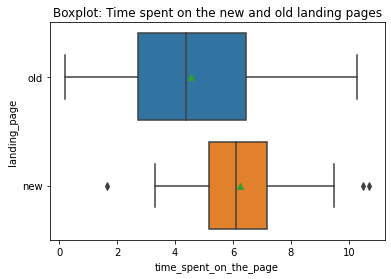

In [ ]:
sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page', showmeans=True)
plt.title('Boxplot: Time spent on the new and old landing pages');
print('Max time spent on each landing pages',df.groupby(['landing_page'])[['time_spent_on_the_page']].max()) # We get the max value to interprete te graphics.
print('Min time spent on each landing pages',df.groupby(['landing_page'])[['time_spent_on_the_page']].min()) # We get the min to interprete te graphics.
print('Mean time spent on each landing pages',df.groupby(['landing_page'])[['time_spent_on_the_page']].mean()) # We get the min to interprete te graphics.

We got some outliers on the "new" landing page.
The new landing page has increased the median time engagement.
The new landing page has incresed the mean time engagement from 4.53 min to 6.22 minutes (37.30%).

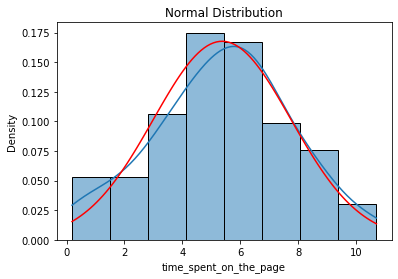

In [ ]:
from scipy.stats import norm
mean = df["time_spent_on_the_page"].mean() 
std = df["time_spent_on_the_page"].std()

# Creating a normal distribution to compare it with our data (time_spent_on_the_page)
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    df["time_spent_on_the_page"].min(), df["time_spent_on_the_page"].max(), 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mean, std) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(df["time_spent_on_the_page"], ax=ax, kde=True, stat="density") # plot the distribution of time_spent_on_the_page using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution")
plt.show() 

### Step 1: Define the null and alternate hypotheses

$u_1$ = mean of time spent on the old landing page

$u_2$ = mean of time spent on the new landing page

Null hypothesis:

>$H_0:u_1 = u_2$

Alternate hypothesis

>$H_a: u_1 < u_2$

### Step 2: Select Appropriate test

2 sample independent t test:

- Continuous data - Yes (time spent on landing pages).
- Normally distributed populations - Yes, graph shows a normal distribution.
- Independent populations - The two samples are from independent populations.
- Standar deviations are not given (unknown).
- Random sampling from the population - Yes, we are assuming that the collected samples  are random sampled.

### Step 3: Decide the significance level

Here, we select α= 0.05.

In [ ]:
from scipy.stats import norm
critical_val1 = norm.ppf(1-.05) # One tail

print("Significal level is:",critical_val1)

Significal level is: 1.6448536269514722


### Step 4: Collect and prepare data

In [ ]:
# New DF where time spent on the new and old landing page are each respectivly in their own columns
old_lp = df[df['landing_page'] == 'old']
old_lp.reset_index(inplace=True)
new_lp = df[df['landing_page'] == 'new']
new_lp.reset_index(inplace=True)

In [ ]:
old_new_sample = pd.DataFrame()
old_new_sample['Time_new_lp'] = new_lp['time_spent_on_the_page']
old_new_sample['Time_old_lp'] = old_lp['time_spent_on_the_page']


In [ ]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on the old landing page is ' + str(round(old_lp['time_spent_on_the_page'].mean(),2)))
print('The mean time spent on the new landing page is ' + str(round(new_lp['time_spent_on_the_page'].mean(),2)))
print('The standard deviation of time spent on the old landing page is ' + str(round(old_lp['time_spent_on_the_page'].std(),2)))
print('The standard deviation of time spent on the new landing page is ' + str(round(new_lp['time_spent_on_the_page'].std(),2)))

The mean time spent on the old landing page is 4.53
The mean time spent on the new landing page is 6.22
The standard deviation of time spent on the old landing page is 2.58
The standard deviation of time spent on the new landing page is 1.82


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(old_new_sample['Time_old_lp'], old_new_sample['Time_new_lp'], equal_var = True, alternative = 'less')
print('The p-value is ' + str(p_value))

The p-value is 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p_value is < 0.05, we can reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean of time spent on the new landing page is higher.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Visual Analysis

converted
group     converted           
control   no                29
          yes               21
treatment no                17
          yes               33

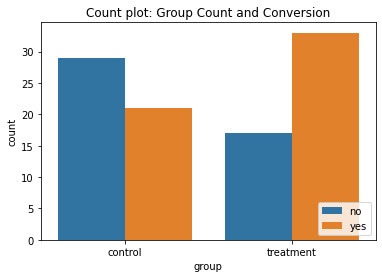

In [ ]:
sns.countplot(data=df, x='group', hue = 'converted')
plt.legend(fontsize= 'small')
plt.legend(loc='lower right')
plt.title('Count plot: Group Count and Conversion');

df.groupby(['group','converted'])[['converted']].count()



The new landing page seems to have a higer conversion. From 21 converting on the old landing page to 33 converting on the new landing page there is a 50% increase in conversions between landing pages. 'No' conversions decreased in 41.37%.

### Step 1: Define the null and alternate hypotheses

$p_1$ = proportion of convertions with old landing page

$p_2$ = proportion of convertions with new landing page

Null hypothesis:

>$H_0:p_1 = p_2$

Alternate hypothesis

>$H_a: p_1 < p_2$

### Step 2: Select Appropriate test

The formulated hypotheses can be tested using Two proportion Z-test concering the convertion rate of the new landing page and the old landig page. 

- Binomally distributed population - Yes, the results are: Yes (conveted) or no (converted).
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
- Can the binomial distribution approximated to normal distribution - Yes. The np and n(1-p) are greater than or equal to 10. 

In [ ]:
contingency_table = pd.crosstab(df['converted'],df['landing_page'], margins=True)
contingency_table

landing_page,new,old,All
converted,,,
no,17,29,46
yes,33,21,54
All,50,50,100


In [ ]:
conv_rate = {'new': 33/50, 'old':21/50}
conv_rate

{'new': 0.66, 'old': 0.42}

Assumptions are satisfied:

$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} = 17 \geq 10 $

### Step 3: Decide the significance level

Here, we select α= 0.05.

In [ ]:
critical_val1 = norm.ppf(1-.05) # One tail 

print("Significal level is:",critical_val1)

Significal level is: 1.6448536269514722


### Step 4: Collect and prepare data

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
convertion_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

### Step 5: Calculate the p-value

In [ ]:
test_stat, p_value = proportions_ztest(convertion_count, nobs, alternative = 'smaller')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the `p_value` is < 0.05, we can reject the null hypothesis. Hence, we have enough statistical evidence to say that the new landing page has a higher convertion rate.

## 3. Is the conversion and preferred language are independent or related?

### Visual Analysis

language_preferred
converted language_preferred                    
no        English                             11
          French                              19
          Spanish                             16
yes       English                             21
          French                              15
          Spanish                             18

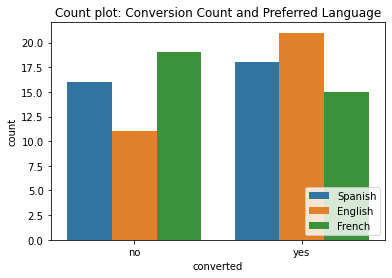

In [ ]:
sns.countplot(data=df, x='converted', hue = 'language_preferred')
plt.legend(fontsize= 'small')
plt.legend(loc='lower right')
plt.title('Count plot: Conversion Count and Preferred Language');

df.groupby(['converted','language_preferred'])[['language_preferred']].count()



It doesn't seem to be a dependency between preferred langage and conversion.

### Step 1: Define the null and alternate hypotheses

Null hypothesis:

>$H_0$: Convertion is independent of preferred language

Alternate hypothesis

>$H_a$: Convertion is dependent of preferred language

### Step 2: Select Appropriate test

Chi-Square test of independence:
- Categorical variables - Yes: Convertion rate and preferred language
- The number of observations in each level is greater than 5 - Yes
- Random sampling from the population - Yes, we are assumed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

Here, we select α= 0.05

Two tailed

### Step 4: Collect and prepare data

In [ ]:
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency


# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the `p_value` is > 0.05, we cannot reject the null hypothesis. Hence, we do not have enough statistical evidence to say that conversion is dependent of prefered language.

## 4. Is the time spent on the new page same for the different language users?

### Visual Analysis

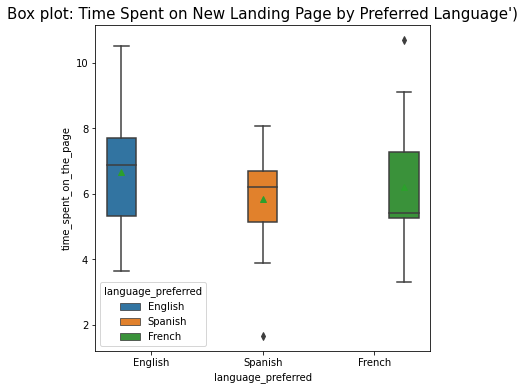

Maximum                               time_spent_on_the_page
group     language_preferred                        
treatment English                              10.50
          French                               10.71
          Spanish                               8.08
Minumum                               time_spent_on_the_page
group     language_preferred                        
treatment English                               3.65
          French                                3.30
          Spanish                               1.65
Mean                               time_spent_on_the_page
group     language_preferred                        
treatment English                           6.663750
          French                            6.196471
          Spanish                           5.835294


In [ ]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = new_lp, hue = 'language_preferred', showmeans=True)
a.set_title("Box plot: Time Spent on New Landing Page by Preferred Language')", fontsize=15)
plt.show()

print('Maximum',new_lp.groupby(['group','language_preferred'])[['time_spent_on_the_page']].max())
print('Minumum',new_lp.groupby(['group','language_preferred'])[['time_spent_on_the_page']].min())
print('Mean',new_lp.groupby(['group','language_preferred'])[['time_spent_on_the_page']].mean())



Behavior for the three groups changes on the new landing page in comparison to the old one. They all reduced their minimum time spent on the page and the mean time of engagement, also increased.
For the maximum time, "Spanish" new landing page shows a slight decrease in time engagement (-7.34%)in comparison with the old landing page.
The highest percentual increase for the mean time spent on the new landing page, was "English" with 49.66%, followed by "French" with 43.61%. Preferred language "Spanish" has a percentual increase of 20.95%.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the mean time spent on the new page of preferred languages english, spanish, french, respectively.

Null hypothesis:

>$H_0: \mu_1 = \mu_2 = \mu_3$

Alternative hypothesis:

>$H_a:$ At least one mean is different from the rest.



### Step 2: Select Appropriate test

One way ANOVA F-test: One descret (`time_spent_on_the_page`) and one continuous (`language_preferred`)  - Just on the New Landing Page

### Step 3: Decide the significance level

Here, we select α= 0.05.
Two tailed

### Step 4: Collect and prepare data

Testing if assumptions are satisfied with "new landing page" data:

1. Testing of normality with Shapiro-Wilk’s to the response variable: `time_spent_on_the_page`  -- Approved
2. Equality of variance with Levene test to the response variable: `time_spent_on_the_page`  -- Approved
3. Samples are independent simple random samples

#### Shapiro-Wilk's test

We want to know if the variable `time_spent_on_the_page` has a normal distributio.

Null hypothesis:

>$H_0:$ `time_spent_on_the_pag` follows a normal distribution against

Alternative hypothesis:

>$H_a:$ `time_spent_on_the_page` does not follow a normal distribution

In [ ]:
from scipy import stats

# p-value
w, p_value = stats.shapiro(new_lp['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since the p_value is > 0.05, we cannot reject the null hypothesis. We do not have enough statistical evidence to say that the variable `time_spent_on_the_page` does not follow a normal distribution.


#### Levene's test

We wanto to check equality of variances between the groups.

Null hypothesis:

>$H_0$: All the population variances are equal

Alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
from scipy.stats import levene
statistic, p_value = levene( new_lp['time_spent_on_the_page'][new_lp['language_preferred']=="Spanish"], 
                                   new_lp['time_spent_on_the_page'][new_lp['language_preferred']=="English"], 
                                   new_lp['time_spent_on_the_page'][new_lp['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p_value is > 0.05, we cannot reject the null hypothesis. We do not have enough statistical evidence to say there is no homogenity of variances.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_lp.loc[df['language_preferred'] == 'Spanish','time_spent_on_the_page'],
                              new_lp.loc[df['language_preferred'] == 'English','time_spent_on_the_page'],
                              new_lp.loc[df['language_preferred'] == 'French','time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.950753956878039


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.950753956878039 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p_value is > 0.05, we cannot reject the null hypothesis. Hence, we do not have enough statistical evidence to say that at least one mean is different to the rest.

## Conclusion and Business Recommendations

#### Conclusions:

- From EDA:
  - Users are spending more time on the new landing page than the old one.
  -There is a greater conversion rate on the new landing page than with the old landing page.
  - Prefered language count is the same for treatment and control group.
  
  
- Testing: 
  - There is enough statistical evidence (p-value of 0.00013 at 5% level of significance) to conclude that users are spending more time on the new landing page than the old landing page.
  - There is enough statistical evidence (p-value of 0.008 at 5% level of significance) to conclude that the converting rate is greater with the new landing page.
  - There is not enough stastistical evidence (p-value of 0.2129 at 5% level of significance)  to  conclude that convertion and preferred language are dependent of each other. 
  - There is not enough stastistical evidence (p-value of 0.95 at 5% level of significance)  to  conclude that for the new landing page, at least one engagement time mean for  preferred languages is different from the others.
  

#### Business Recomendation:

The new landing page is not increasing the maximum time spent on it, rather than reducing the mínimum time spent on the landing page from 19 seconds to 1.65 minutes. However, it has statistically proven, with a p-value of 0.008 at 5% level of significance, the increase in converting ratio, and statistically proven with a p-value of 0.00013 at 5% level of significance,that the mean engagement time of the new landing page is higher than with the old landing page. 

The recommendation is to focus on improving the landing page specifically in terms of the outline & recommended content since engagement time spent on the page converts to subscriptions. Focusing on language preference has no impact on users' conversion and that has been statistically proven with a p-value of 0.2129 at 5% level of significance.

¿Can the conversion rate be higher? ¿What is the median engagement time that drives a user to convert?

It would be also interesting to analyze the “type” of news that engage the most and apply engagement strategies through them and gain subscriptions.


___